In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from pathlib import Path

In [4]:
CSV_FOLDER = Path('../csv/').resolve()
TABLE_FOLDER = Path('../tex/').resolve()
IMG_FOLDER = Path('../images/').resolve()

In [5]:
assert CSV_FOLDER.is_dir()
assert TABLE_FOLDER.is_dir()
assert IMG_FOLDER.is_dir()

In [6]:
pd.__version__ 

'1.3.5'

File mapping: 

- [x] Disease coverage: `guideline_question_disease_counts.csv`
- [x] Tables on model performance for diseaases: `all_disease_settings_row_format.csv`
- [ ] Tables on model performance for drugs: `all_drug_settings_row_format.csv`

In [7]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def highlight_second_max(s, props=''):
    second_max = np.sort(s.values)[-2]
    return np.where(s == second_max, props, '')

# Semantic types

In [8]:
semantic_df = pd.read_csv(CSV_FOLDER / 'guideline_semantic_counts.csv', index_col=0)
semantic_df

Semantic Type  Frequency
24                       Medical Device        685
23                               Enzyme        734
22                  Manufactured Object        743
21                 Laboratory Procedure        827
20                 Diagnostic Procedure        956
19                       Gene or Genome       1032
18                      Spatial Concept       1105
17                    Research Activity       1108
16                              Hormone       1109
15                     Organic Chemical       1132
14                             Activity       1209
13                    Conceptual Entity       1242
12                     Population Group       1332
11                 Health Care Activity       1565
10  Therapeutic or Preventive Procedure       1933
9       Amino Acid, Peptide, or Protein       2016
8                      Temporal Concept       2111
7                       Idea or Concept       2516
6               Pharmacologic Substance       2592
5                   Disease or Syndrome       3113
4                  Intellectual Product       5161
3                  Quantitative Concept       5397
2                    Functional Concept       5686
1                               Finding       5940
0                   Qualitative Concept       6306

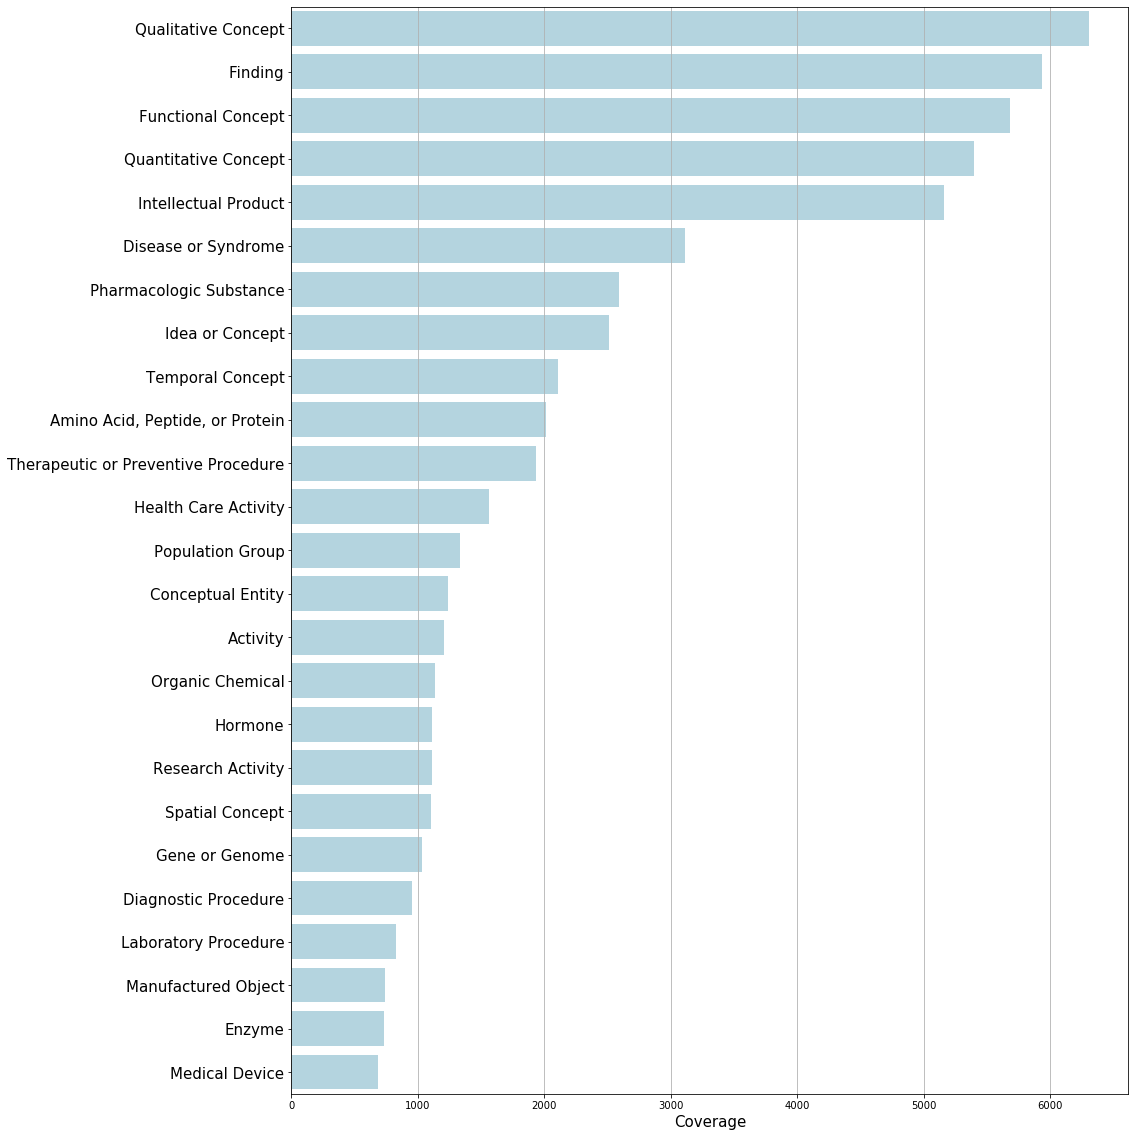

In [9]:
plot_df = semantic_df.sort_values('Frequency')
# plot_df.columns = ['Disease Subgroup', 'Source', 'Coverage']


fig, ax = plt.subplots(figsize=(15, 20))
sns.barplot(x="Frequency", y="Semantic Type", #hue="Source",
            ax=ax,
            data=plot_df, color='lightblue'#palette="Pastel1"
           )

ax.set_ylabel(None)
ax.set_xlabel('Coverage', fontsize=15)
#ax.legend(title='Source', fontsize=15, title_fontsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.invert_yaxis()
ax.xaxis.grid(True)

fig.savefig('../images/semantic_type_count.pdf', bbox_inches='tight')

# Disease coverages

In [10]:
coverage_df = pd.read_csv(CSV_FOLDER / 'guideline_question_disease_counts.csv', index_col=0)

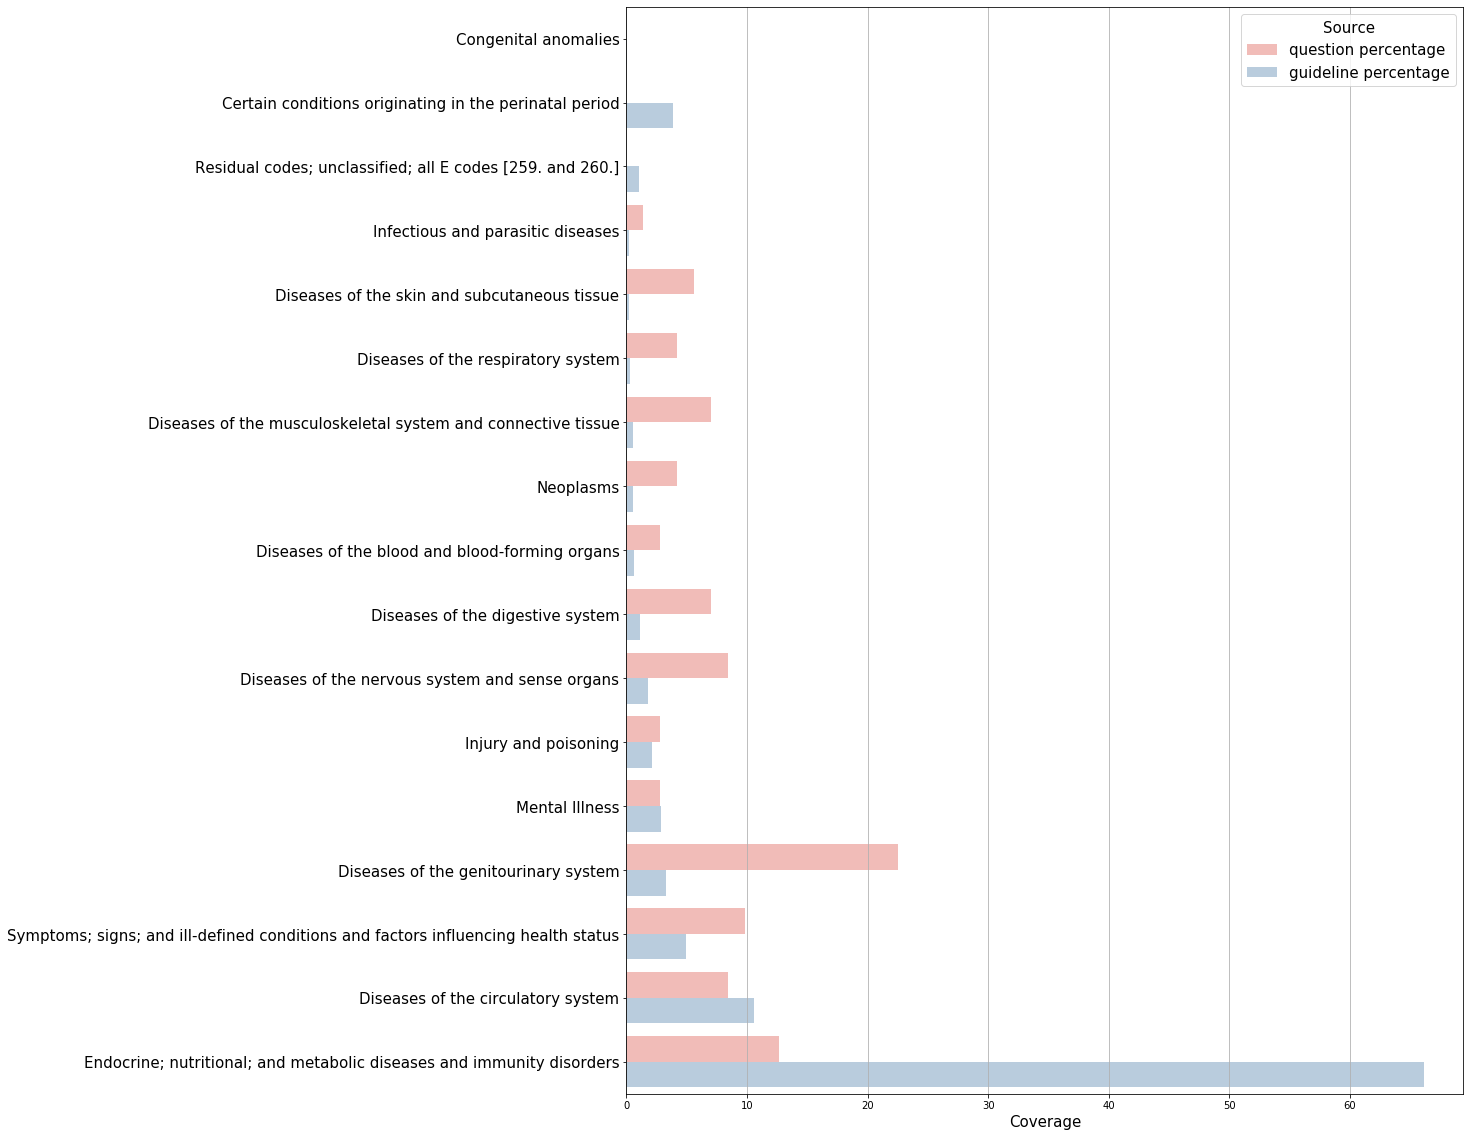

In [11]:
plot_df = (coverage_df.set_index('MULTI CCS LVL 1')
           .stack()
           .to_frame()
           .sort_values(by=[0])
           .reset_index())
plot_df.columns = ['Disease Subgroup', 'Source', 'Coverage']


fig, ax = plt.subplots(figsize=(15, 20))
sns.barplot(x="Coverage", y="Disease Subgroup", hue="Source", ax=ax,
            data=plot_df, palette="Pastel1")

ax.set_ylabel(None)
ax.set_xlabel('Coverage', fontsize=15)
ax.legend(title='Source', fontsize=15, title_fontsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.xaxis.grid(True)

fig.savefig('../images/subgroup_disease_coverage.pdf', bbox_inches='tight')

# Drugs

In [12]:
drug_df = pd.read_csv(CSV_FOLDER / 'all_drug_settings_row_format.csv', index_col=0)
print(list(drug_df.columns))
drug_df.head()

['model', 'setting', 'question', 'grouping code', 'bleu', 'f1_cum', 'precision_cum', 'P@1', 'P@5', 'recall', 'map', 'f1', 'bleu_cum', 'recall_cum']


model                               setting  \
0                 BERT                             Setting 1   
1              SciBERT                             Setting 1   
2                 BERT  Setting 2 (Conf Score, Drug Overlap)   
3                 BERT                             Setting 3   
4  BioClinicalBERT-ADR  Setting 2 (Drug Overlap, Conf Score)   

                                           question      grouping code  \
0  What is known about Biguanides (Metformin) drugs  Antidiabetic drug   
1  What is known about Biguanides (Metformin) drugs  Antidiabetic drug   
2  What is known about Biguanides (Metformin) drugs  Antidiabetic drug   
3  What is known about Biguanides (Metformin) drugs  Antidiabetic drug   
4  What is known about Biguanides (Metformin) drugs  Antidiabetic drug   

       bleu                                             f1_cum  \
0  0.000495                                                NaN   
1       NaN  [0.008872651356993737, 0.02380952380952381, 0....   
2       NaN                                                NaN   
3       NaN                                                NaN   
4  0.014803                                                NaN   

                                       precision_cum       P@1  P@5  recall  \
0                                                NaN       NaN  NaN     NaN   
1                                                NaN       NaN  NaN     NaN   
2  [0.8536585365853658, 0.7671957671957672, 0.828...       NaN  NaN     NaN   
3                                                NaN  0.982456  NaN     NaN   
4                                                NaN       NaN  NaN     NaN   

   map  f1 bleu_cum recall_cum  
0  NaN NaN      NaN        NaN  
1  NaN NaN      NaN        NaN  
2  NaN NaN      NaN        NaN  
3  NaN NaN      NaN        NaN  
4  NaN NaN      NaN        NaN

In [13]:
result_cols = ['bleu', 'P@1', 'P@5', 'map', 'f1', 'recall']

drug_model_perf = drug_df.query(
    "setting == 'Setting 1'"
    ).groupby(
    ['model']
    )[result_cols].mean()
    #.agg(['mean', 'std'])

drug_model_perf.head()

bleu       P@1       P@5       map        f1  \
model                                                                   
BERT                 0.100405  0.910256  0.751162  0.756533  0.253779   
BioBERT              0.099938  0.725771  0.642678  0.635167  0.231014   
BioBERT-BioASQ       0.081349  0.708354  0.693917  0.703717  0.222167   
BioClinicalBERT-ADR  0.074507  0.593474  0.614452  0.596583  0.192184   
SciBERT              0.120872  0.946564  0.756831  0.772030  0.281105   

                       recall  
model                          
BERT                 0.206404  
BioBERT              0.192442  
BioBERT-BioASQ       0.162334  
BioClinicalBERT-ADR  0.146059  
SciBERT              0.228047

In [14]:
drug_knowledge_perf = (drug_df
                      .query("setting != 'Setting 1'")\
                      .groupby(
                      ['model', 'setting'] , 
                     )[result_cols].mean()
                     #.agg(['mean', 'std']
                     ).reset_index()

# For each group (model), finding the best setting
idx = (drug_knowledge_perf.groupby(['model'])['map'].transform(max) 
       == drug_knowledge_perf['map'])

drug_knowledge_perf = drug_knowledge_perf[idx]

drug_knowledge_perf['model'] = drug_knowledge_perf.model + '-KA'
drug_knowledge_perf.drop('setting', axis=1, inplace=True)

drug_knowledge_perf.set_index('model', inplace=True)
drug_knowledge_perf

bleu       P@1       P@5  \
model                                                                   
knowledge agumented BERT                 0.098642  0.900347  0.862943   
knowledge agumented BioBERT              0.083077  0.801831  0.704324   
knowledge agumented BioBERT-BioASQ       0.117472  0.711306  0.724570   
knowledge agumented BioClinicalBERT-ADR  0.084673  0.597668  0.594898   
knowledge agumented SciBERT              0.128122  0.911618  0.823404   

                                              map        f1    recall  
model                                                                  
knowledge agumented BERT                 0.820950  0.280994  0.213040  
knowledge agumented BioBERT              0.719528  0.234289  0.170146  
knowledge agumented BioBERT-BioASQ       0.716140  0.272268  0.221227  
knowledge agumented BioClinicalBERT-ADR  0.587021  0.198860  0.152218  
knowledge agumented SciBERT              0.793705  0.298131  0.232483

In [15]:
drug_perf = pd.concat((drug_model_perf, drug_knowledge_perf), axis=0)

tb_styler = drug_perf.round(3).style.apply(highlight_max, props='color:{green}', axis=0)\
                              .apply(highlight_second_max, props='color:{blue}', axis=0)

tb_styler.format('{:0.3f}') 
                                    
print(tb_styler.to_latex())

with open('../tex/tb_drug_performance_summary.tex', 'w') as fOut:
    fOut.write(tb_styler.to_latex(hrules=True))

\begin{tabular}{lrrrrrr}
{} & {bleu} & {P@1} & {P@5} & {map} & {f1} & {recall} \\
{model} & {} & {} & {} & {} & {} & {} \\
BERT & 0.100 & 0.910 & 0.751 & 0.757 & 0.254 & 0.206 \\
BioBERT & 0.100 & 0.726 & 0.643 & 0.635 & 0.231 & 0.192 \\
BioBERT-BioASQ & 0.081 & 0.708 & 0.694 & 0.704 & 0.222 & 0.162 \\
BioClinicalBERT-ADR & 0.075 & 0.593 & 0.614 & 0.597 & 0.192 & 0.146 \\
SciBERT & \color{blue} 0.121 & \color{green} 0.947 & 0.757 & 0.772 & \color{blue} 0.281 & \color{blue} 0.228 \\
knowledge agumented BERT & 0.099 & 0.900 & \color{green} 0.863 & \color{green} 0.821 & \color{blue} 0.281 & 0.213 \\
knowledge agumented BioBERT & 0.083 & 0.802 & 0.704 & 0.720 & 0.234 & 0.170 \\
knowledge agumented BioBERT-BioASQ & 0.117 & 0.711 & 0.725 & 0.716 & 0.272 & 0.221 \\
knowledge agumented BioClinicalBERT-ADR & 0.085 & 0.598 & 0.595 & 0.587 & 0.199 & 0.152 \\
knowledge agumented SciBERT & \color{green} 0.128 & \color{blue} 0.912 & \color{blue} 0.823 & \color{blue} 0.794 & \color{green} 0.298 & \co

# Diseases

In [16]:
disease_df = pd.read_csv(CSV_FOLDER / 'all_disease_settings_row_format.csv', index_col=0)
print(list(disease_df.columns))
disease_df.head()

['model', 'setting', 'question', 'grouping code', 'bleu_cum', 'precision_cum', 'recall_cum', 'f1_cum', 'P@1', 'P@5', 'bleu', 'map', 'f1', 'recall']


model                                            setting  \
0       BioBERT-BioASQ  Setting 5 (Conf Score, More Ancestors, Fewer H...   
1                 BERT  Setting 5 (More Ancestors, Fewer Hops, Conf Sc...   
2              SciBERT            Setting 2 (Conf Score, Disease Overlap)   
3  BioClinicalBERT-ADR            Setting 2 (Disease Overlap, Conf Score)   
4       BioBERT-BioASQ            Setting 2 (Conf Score, Disease Overlap)   

           question                     grouping code  \
0  Abdominal Hernia  Diseases of the digestive system   
1  Abdominal Hernia  Diseases of the digestive system   
2  Abdominal Hernia  Diseases of the digestive system   
3  Abdominal Hernia  Diseases of the digestive system   
4  Abdominal Hernia  Diseases of the digestive system   

                                            bleu_cum  \
0  [0.04547005253496859, 0.2958579881656805, 0.27...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [0.0018054918351503536, 0.32608919057401387, 0...   

                                       precision_cum  \
0                                                NaN   
1  [0.34782608695652173, 0.2709677419354839, 0.20...   
2  [0.27722772277227725, 0.2585034013605442, 0.20...   
3                                                NaN   
4                                                NaN   

                                          recall_cum f1_cum  P@1  P@5  bleu  \
0                                                NaN    NaN  NaN  NaN   NaN   
1                                                NaN    NaN  NaN  NaN   NaN   
2                                                NaN    NaN  NaN  NaN   NaN   
3  [0.42657342657342656, 0.5244755244755245, 0.53...    NaN  NaN  NaN   NaN   
4                                                NaN    NaN  NaN  NaN   NaN   

   map  f1  recall  
0  NaN NaN     NaN  
1  NaN NaN     NaN  
2  NaN NaN     NaN  
3  NaN NaN     NaN  
4  NaN NaN     NaN

## Native Models

### Overall Performance

In [17]:
result_cols = ['bleu', 'P@1', 'P@5', 'map', 'f1', 'recall']

dis_model_perf = disease_df.query(
    "setting == 'Setting 1'"
    ).groupby(
    ['model']
    )[result_cols].mean()
    #.agg(['mean', 'std'])

tb_styler = dis_model_perf.round(3).style.apply(highlight_max, props='color:{green}', axis=0)\
                             .apply(highlight_second_max, props='color:{blue}', axis=0)

tb_styler.format('{:0.3f}') 
                                    
print(tb_styler.to_latex())

with open('../tex/tb_model_performance_summary.tex', 'w') as fOut:
    fOut.write(tb_styler.to_latex(hrules=True))

\begin{tabular}{lrrrrrr}
{} & {bleu} & {P@1} & {P@5} & {map} & {f1} & {recall} \\
{model} & {} & {} & {} & {} & {} & {} \\
BERT & 0.117 & \color{green} 0.468 & \color{green} 0.382 & \color{green} 0.390 & 0.213 & 0.241 \\
BioBERT & 0.116 & 0.431 & 0.339 & 0.346 & 0.200 & 0.238 \\
BioBERT-BioASQ & \color{blue} 0.132 & 0.383 & 0.329 & 0.332 & \color{blue} 0.217 & \color{blue} 0.281 \\
BioClinicalBERT-ADR & 0.125 & 0.368 & 0.317 & 0.316 & 0.205 & 0.259 \\
SciBERT & \color{green} 0.165 & \color{blue} 0.461 & \color{blue} 0.349 & \color{blue} 0.364 & \color{green} 0.261 & \color{green} 0.354 \\
\end{tabular}



### Plotting Model performance vs group

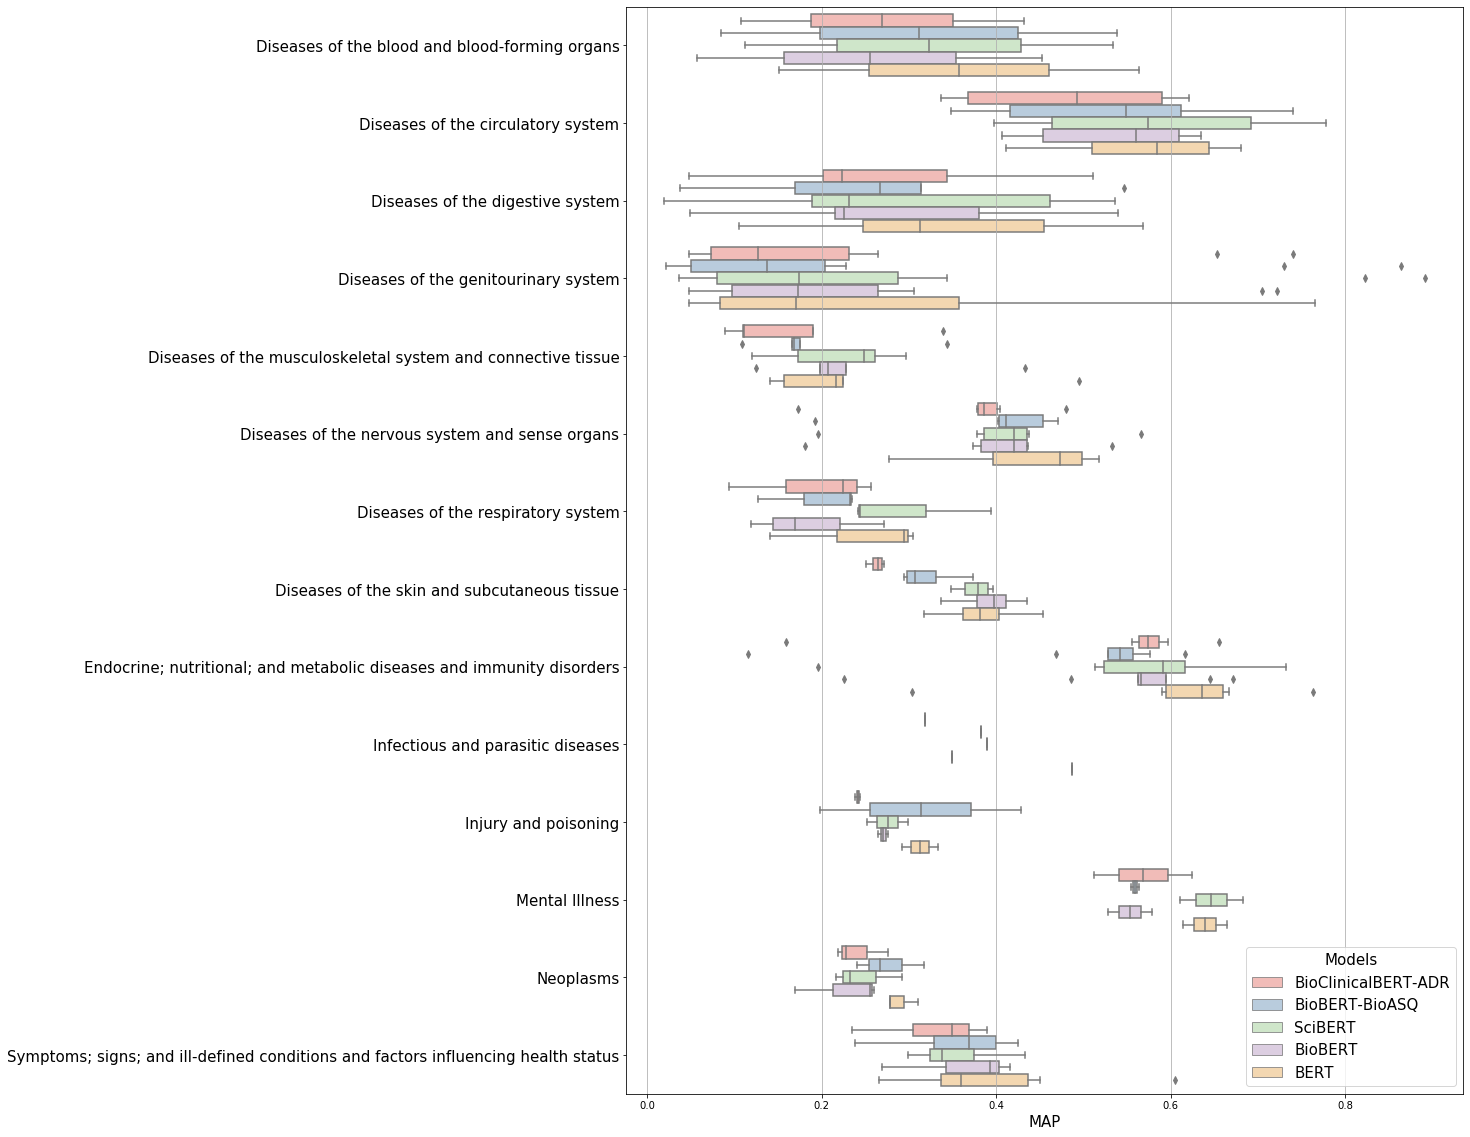

In [18]:
plot_df = disease_df.query("setting == 'Setting 1'").copy()
plot_df['grouping code'] = plot_df['grouping code'].astype('category')
plot_df['group_label'] = plot_df['grouping code'].cat.codes.values
# plot_df.head()

fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(x="map", y="grouping code", hue="model", ax=ax,
            data=plot_df, palette="Pastel1")
ax.set_ylabel(None)
ax.set_xlabel('MAP', fontsize=15)
ax.legend(title='Models', fontsize=15, title_fontsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.xaxis.grid(True)

fig.savefig('../images/model_subgroup.pdf', bbox_inches='tight')
#ax.set_xlabel(plot_df['grouping code'].cat.categories)

### SciBERT vs BERT for diseases

In [19]:
dis_comp_model_perf = disease_df.query("setting == 'Setting 1'").copy()
dis_comp_model_perf = (dis_comp_model_perf[dis_comp_model_perf.model.isin(['SciBERT', 'BERT'])]
                       .groupby(['model', 'question', 'grouping code'])
                       ['map'].max()
                       .to_frame()
                       .reset_index()
                       .pivot(index=['grouping code', 'question'],
                          columns='model',
                          values='map'
                         )
                      )
dis_comp_model_perf['residuals'] = dis_comp_model_perf['BERT'] - dis_comp_model_perf['SciBERT']
dis_comp_model_perf

model                                                                                                      BERT  \
grouping code                                      question                                                       
Diseases of the blood and blood-forming organs     Deficiency and other anemia                         0.564175   
                                                   Diseases of white blood cells                       0.150494   
Diseases of the circulatory system                 Acute myocardial infarction                         0.489282   
                                                   Aortic and peripheral arterial embolism or thro...  0.659326   
                                                   Congestive heart failure; nonhypertensive           0.597270   
...                                                                                                         ...   
Symptoms; signs; and ill-defined conditions and... Gangrene                                            0.341622   
                                                   Nausea and vomiting                                 0.422271   
                                                   Shock                                               0.265141   
                                                   Symptoms; signs; and ill-defined conditions and...  0.359975   
                                                   Syncope                                             0.450309   

model                                                                                                   SciBERT  \
grouping code                                      question                                                       
Diseases of the blood and blood-forming organs     Deficiency and other anemia                         0.534316   
                                                   Diseases of white blood cells                       0.112155   
Diseases of the circulatory system                 Acute myocardial infarction                         0.458762   
                                                   Aortic and peripheral arterial embolism or thro...  0.700638   
                                                   Congestive heart failure; nonhypertensive           0.666566   
...                                                                                                         ...   
Symptoms; signs; and ill-defined conditions and... Gangrene                                            0.330746   
                                                   Nausea and vomiting                                 0.433383   
                                                   Shock                                               0.299031   
                                                   Symptoms; signs; and ill-defined conditions and...  0.356338   
                                                   Syncope                                             0.317936   

model                                                                                                  residuals  
grouping code                                      question                                                       
Diseases of the blood and blood-forming organs     Deficiency and other anemia                          0.029859  
                                                   Diseases of white blood cells                        0.038339  
Diseases of the circulatory system                 Acute myocardial infarction                          0.030519  
                                                   Aortic and peripheral arterial embolism or thro...  -0.041312  
                                                   Congestive heart failure; nonhypertensive           -0.069296  
...                                                                                                          ...  
Symptoms; signs; and ill-defined conditions and... Gangrene                             

In [20]:
color_df = dis_comp_model_perf.reset_index().groupby('grouping code').residuals.median().to_frame()
color_df['color'] = color_df.residuals.apply(lambda x: 'orange' if x > 0 else 'yellow')
color_df.color.to_dict()

{'Diseases of the blood and blood-forming organs': 'orange',
 'Diseases of the circulatory system': 'yellow',
 'Diseases of the digestive system': 'orange',
 'Diseases of the genitourinary system': 'yellow',
 'Diseases of the musculoskeletal system and connective tissue': 'orange',
 'Diseases of the nervous system and sense organs': 'orange',
 'Diseases of the respiratory system': 'yellow',
 'Diseases of the skin and subcutaneous tissue': 'orange',
 'Endocrine; nutritional; and metabolic diseases and immunity disorders': 'orange',
 'Infectious and parasitic diseases': 'orange',
 'Injury and poisoning': 'orange',
 'Mental Illness': 'yellow',
 'Neoplasms': 'orange',
 'Symptoms; signs; and ill-defined conditions and factors influencing health status': 'orange'}

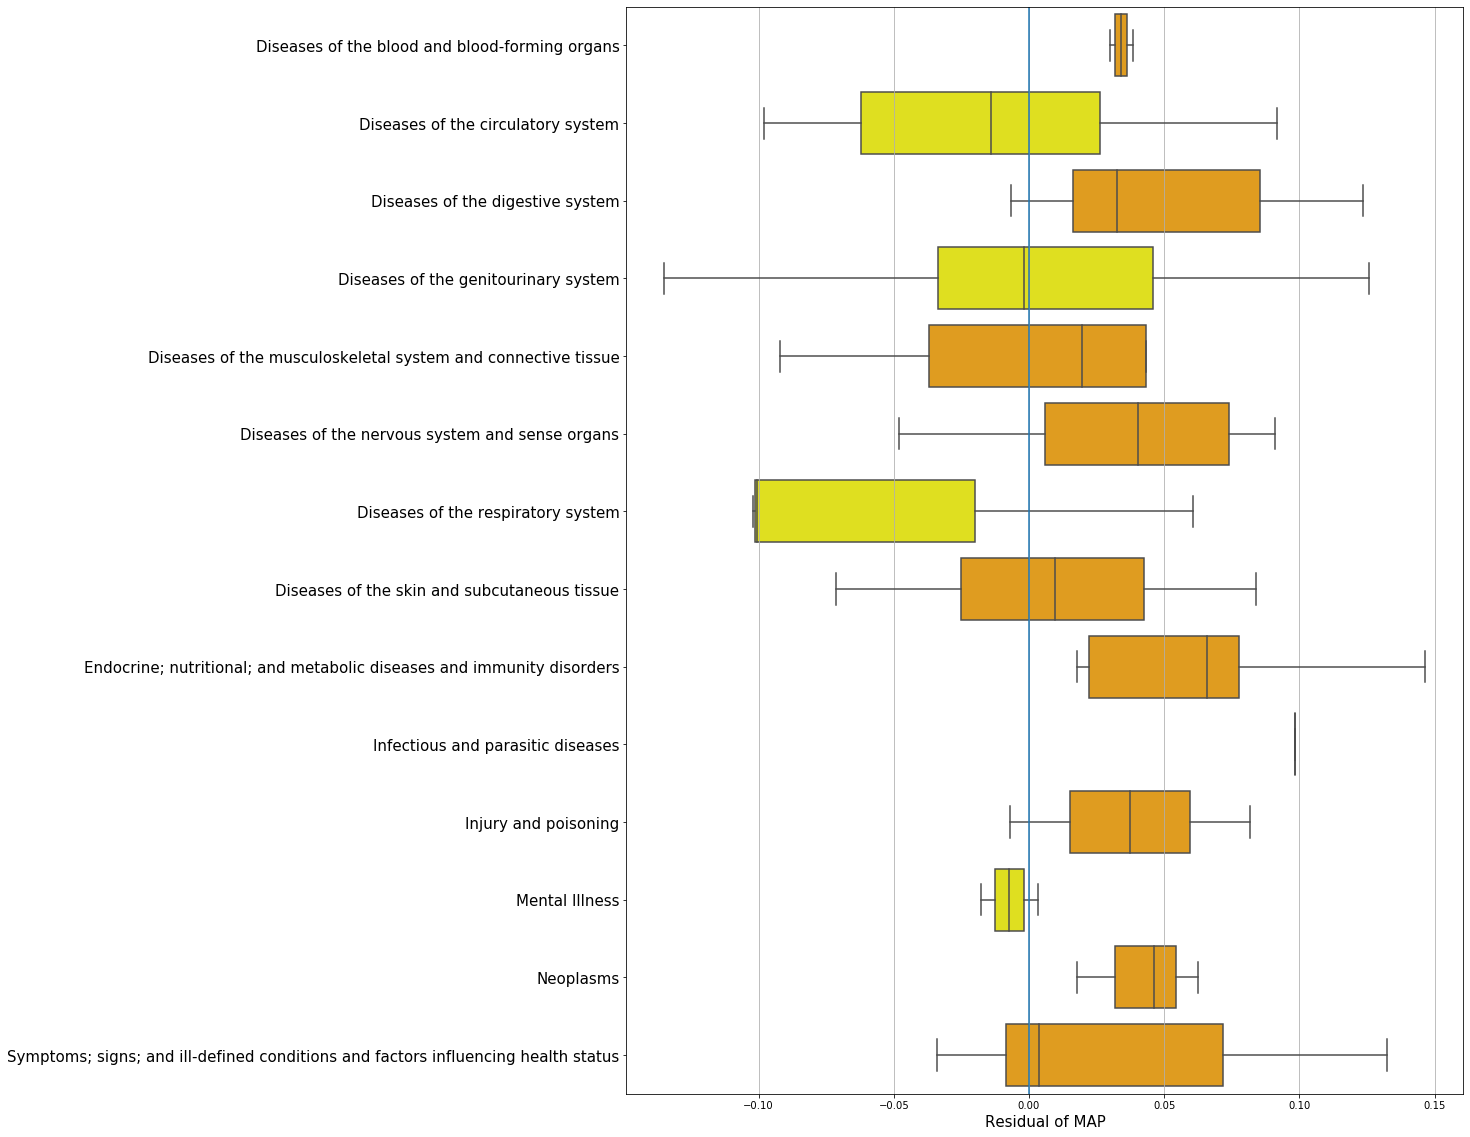

In [21]:
plot_df = dis_comp_model_perf.reset_index()
plot_df['grouping code'] = plot_df['grouping code'].astype('category')
plot_df['group_label'] = plot_df['grouping code'].cat.codes.values
# plot_df.head()

fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(x="residuals", y="grouping code", #hue="setting",
            ax=ax,
            data=plot_df, 
            palette=color_df.color.to_dict(),  #pastel 
            showfliers = False)
ax.set_ylabel(None)
ax.axvline(0)
ax.set_xlabel('Residual of MAP', fontsize=15)
#ax.legend(title='Knowledge Augmentation', fontsize=15, title_fontsize=15, bbox_to_anchor=[0.6, 0.9])
ax.tick_params(axis='y', which='major', labelsize=15)
ax.xaxis.grid(True)

fig.savefig('../images/scibert-bert-boxplot.pdf', bbox_inches='tight')


### model performance with standard deviation

In [22]:
dis_subgroup_model_perf = disease_df.query(
    "setting == 'Setting 1'"
    ).groupby(
    ['model']
    )[result_cols].agg(['mean', 'std'])
    
for col in result_cols:
    dis_subgroup_model_perf[('Output', col)] = (dis_subgroup_model_perf[(col, 'mean')].round(3).astype(str) 
                                                + ' $\pm$ (' 
                                                + dis_subgroup_model_perf[(col, 'std')].round(3).astype(str) 
                                                + ')'
                                               )
dis_subgroup_model_perf.loc[:, pd.IndexSlice['Output', :]]

Output                       \
                                    bleu                  P@1   
model                                                           
BERT                 0.117 $\pm$ (0.079)  0.468 $\pm$ (0.227)   
BioBERT              0.116 $\pm$ (0.059)  0.431 $\pm$ (0.169)   
BioBERT-BioASQ       0.132 $\pm$ (0.073)  0.383 $\pm$ (0.193)   
BioClinicalBERT-ADR  0.125 $\pm$ (0.061)  0.368 $\pm$ (0.182)   
SciBERT              0.165 $\pm$ (0.082)   0.461 $\pm$ (0.23)   

                                                               \
                                     P@5                  map   
model                                                           
BERT                  0.382 $\pm$ (0.21)   0.39 $\pm$ (0.197)   
BioBERT                0.339 $\pm$ (0.2)  0.346 $\pm$ (0.182)   
BioBERT-BioASQ       0.329 $\pm$ (0.204)  0.332 $\pm$ (0.194)   
BioClinicalBERT-ADR  0.317 $\pm$ (0.201)  0.316 $\pm$ (0.184)   
SciBERT              0.349 $\pm$ (0.218)  0.364 $\pm$ (0.203)   

                                                               
                                      f1               recall  
model                                                          
BERT                 0.213 $\pm$ (0.077)  0.241 $\pm$ (0.171)  
BioBERT                0.2 $\pm$ (0.056)  0.238 $\pm$ (0.152)  
BioBERT-BioASQ       0.217 $\pm$ (0.068)  0.281 $\pm$ (0.163)  
BioClinicalBERT-ADR  0.205 $\pm$ (0.056)  0.259 $\pm$ (0.149)  
SciBERT              0.261 $\pm$ (0.081)  0.354 $\pm$ (0.182)

## Knowledge Augmented Models

### Overall Performance with Best Augmentation

In [23]:
result_cols = ['bleu', 'P@1', 'P@5', 'map', 'f1', 'recall']

# Finding the aggregate values
dis_knowledge_perf = (disease_df
                      .query("setting != 'Setting 1'")\
                      .groupby(
                      ['model', 'setting'] , 
                     )[result_cols].mean()
                     #.agg(['mean', 'std']
                     ).reset_index()

# For each group (model), finding the best setting
idx = (dis_knowledge_perf.groupby(['model'])['map'].transform(max) 
       == dis_knowledge_perf['map'])

dis_knowledge_perf = dis_knowledge_perf[idx]

dis_knowledge_perf['model'] = dis_knowledge_perf.model + '-KA'
dis_knowledge_perf.drop('setting', axis=1, inplace=True)

dis_knowledge_perf.set_index('model', inplace=True)

In [24]:
tb_styler = dis_knowledge_perf.round(3).style.apply(highlight_max, props='color:{green}', axis=0)\
                                             .apply(highlight_second_max, props='color:{blue}', axis=0)

tb_styler.format({x:'{:0.3f}' for x in result_cols}) 
                                    
print(tb_styler.to_latex())

with open('../tex/tb_knowledgeModel_performance_summary.tex', 'w') as fOut:
    fOut.write(tb_styler.to_latex(hrules=True))

\begin{tabular}{lrrrrrr}
{} & {bleu} & {P@1} & {P@5} & {map} & {f1} & {recall} \\
{model} & {} & {} & {} & {} & {} & {} \\
BERT-KA & 0.075 & \color{blue} 0.467 & \color{green} 0.419 & \color{green} 0.438 & 0.169 & 0.186 \\
BioBERT-KA & 0.127 & 0.434 & 0.348 & 0.353 & 0.215 & 0.254 \\
BioBERT-BioASQ-KA & \color{blue} 0.141 & 0.458 & \color{blue} 0.362 & 0.369 & \color{blue} 0.237 & \color{blue} 0.280 \\
BioClinicalBERT-ADR-KA & 0.121 & 0.406 & 0.321 & 0.330 & 0.202 & 0.242 \\
SciBERT-KA & \color{green} 0.192 & \color{green} 0.473 & 0.341 & \color{blue} 0.375 & \color{green} 0.291 & \color{green} 0.405 \\
\end{tabular}



### Lif of performance vs group

In [25]:
ka_df = disease_df.pivot_table(
    values='map', 
    index=['model', 'question', 'grouping code'],
    columns='setting',
    aggfunc='max'
   )

all_ka_settings = ka_df.columns.drop('Setting 1')
print(all_ka_settings)

# ka_df.head()

for col in all_ka_settings:
    ka_df[col] = 100 * (ka_df[col] - ka_df['Setting 1']) / (ka_df['Setting 1'] + 1e-10)

ka_df.drop('Setting 1', axis=1, inplace=True)
ka_df.head()

Index(['Setting 2 (Conf Score, Disease Overlap)',
       'Setting 2 (Disease Overlap, Conf Score)', 'Setting 3',
       'Setting 4 (Hops: 3)', 'Setting 4 (Hops: 5)', 'Setting 4 (Hops: 6)',
       'Setting 4 (Hops: 8)',
       'Setting 5 (Conf Score, More Ancestors, Fewer Hops)',
       'Setting 5 (Fewer Hops, More Ancestors, Conf Score)',
       'Setting 5 (More Ancestors, Fewer Hops, Conf Score)'],
      dtype='object', name='setting')


setting                                                                                                      Setting 2 (Conf Score, Disease Overlap)  \
model question                                           grouping code                                                                                 
BERT  (Spondylosis; intervertebral disc disorders, ot... Diseases of the musculoskeletal system and conn...                                38.373905   
      Abdominal Hernia                                   Diseases of the digestive system                                                  17.615224   
      Abdominal hernia                                   Diseases of the digestive system                                                 -80.208333   
      Abdominal pain                                     Symptoms; signs; and ill-defined conditions and...                               -10.762861   
      Acute and unspecified renal failure                Diseases of the genitourinary system                                              -8.953224   

setting                                                                                                      Setting 2 (Disease Overlap, Conf Score)  \
model question                                           grouping code                                                                                 
BERT  (Spondylosis; intervertebral disc disorders, ot... Diseases of the musculoskeletal system and conn...                               -74.954253   
      Abdominal Hernia                                   Diseases of the digestive system                                                 -72.894884   
      Abdominal hernia                                   Diseases of the digestive system                                                 -92.635659   
      Abdominal pain                                     Symptoms; signs; and ill-defined conditions and...                               -65.240085   
      Acute and unspecified renal failure                Diseases of the genitourinary system                                             -77.858177   

setting                                                                                                      Setting 3  \
model question                                           grouping code                                                   
BERT  (Spondylosis; intervertebral disc disorders, ot... Diseases of the musculoskeletal system and conn...  -7.181937   
      Abdominal Hernia                                   Diseases of the digestive system                   -13.436180   
      Abdominal hernia                                   Diseases of the digestive system                   -57.777778   
      Abdominal pain                                     Symptoms; signs; and ill-defined conditions and... -24.832999   
      Acute and unspecified renal failure                Diseases of the genitourinary system                -8.254530   

setting                                                                                                      Setting 4 (Hops: 3)  \
model question                                           grouping code                                                             
BERT  (Spondylosis; intervertebral disc disorders, ot... Diseases of the musculoskeletal system and conn...           101.904400   
      Abdominal Hernia                                   Diseases of the digestive system                               6.774890   
      Abdominal hernia                                   Diseases of the digestive system                               5.555556   
      Abdominal pain                                     Symptoms; signs; and ill-defined conditions and...                  NaN   
      Acute and unspecified renal failure                Diseases of the genitourinary system                         100.504193   

setting                                                                                   

In [26]:
# wide to long format
plot_df = ka_df.stack()\
               .to_frame()\
               .rename({0: 'map'}, axis=1)\
               .reset_index()
plot_df

model                                           question  \
0        BERT  (Spondylosis; intervertebral disc disorders, o...   
1        BERT  (Spondylosis; intervertebral disc disorders, o...   
2        BERT  (Spondylosis; intervertebral disc disorders, o...   
3        BERT  (Spondylosis; intervertebral disc disorders, o...   
4        BERT  (Spondylosis; intervertebral disc disorders, o...   
...       ...                                                ...   
2959  SciBERT                           Urinary tract infections   
2960  SciBERT                           Urinary tract infections   
2961  SciBERT                           Urinary tract infections   
2962  SciBERT                           Urinary tract infections   
2963  SciBERT                           Urinary tract infections   

                                          grouping code  \
0     Diseases of the musculoskeletal system and con...   
1     Diseases of the musculoskeletal system and con...   
2     Diseases of the musculoskeletal system and con...   
3     Diseases of the musculoskeletal system and con...   
4     Diseases of the musculoskeletal system and con...   
...                                                 ...   
2959               Diseases of the genitourinary system   
2960               Diseases of the genitourinary system   
2961               Diseases of the genitourinary system   
2962               Diseases of the genitourinary system   
2963               Diseases of the genitourinary system   

                                                setting         map  
0               Setting 2 (Conf Score, Disease Overlap)   38.373905  
1               Setting 2 (Disease Overlap, Conf Score)  -74.954253  
2                                             Setting 3   -7.181937  
3                                   Setting 4 (Hops: 3)  101.904400  
4                                   Setting 4 (Hops: 5)    5.625167  
...                                                 ...         ...  
2959                                Setting 4 (Hops: 6)  -40.311985  
2960                                Setting 4 (Hops: 8)  -22.269798  
2961  Setting 5 (Conf Score, More Ancestors, Fewer H...    0.000000  
2962  Setting 5 (Fewer Hops, More Ancestors, Conf Sc...  -41.387847  
2963  Setting 5 (More Ancestors, Fewer Hops, Conf Sc...  -71.700831  

[2964 rows x 5 columns]

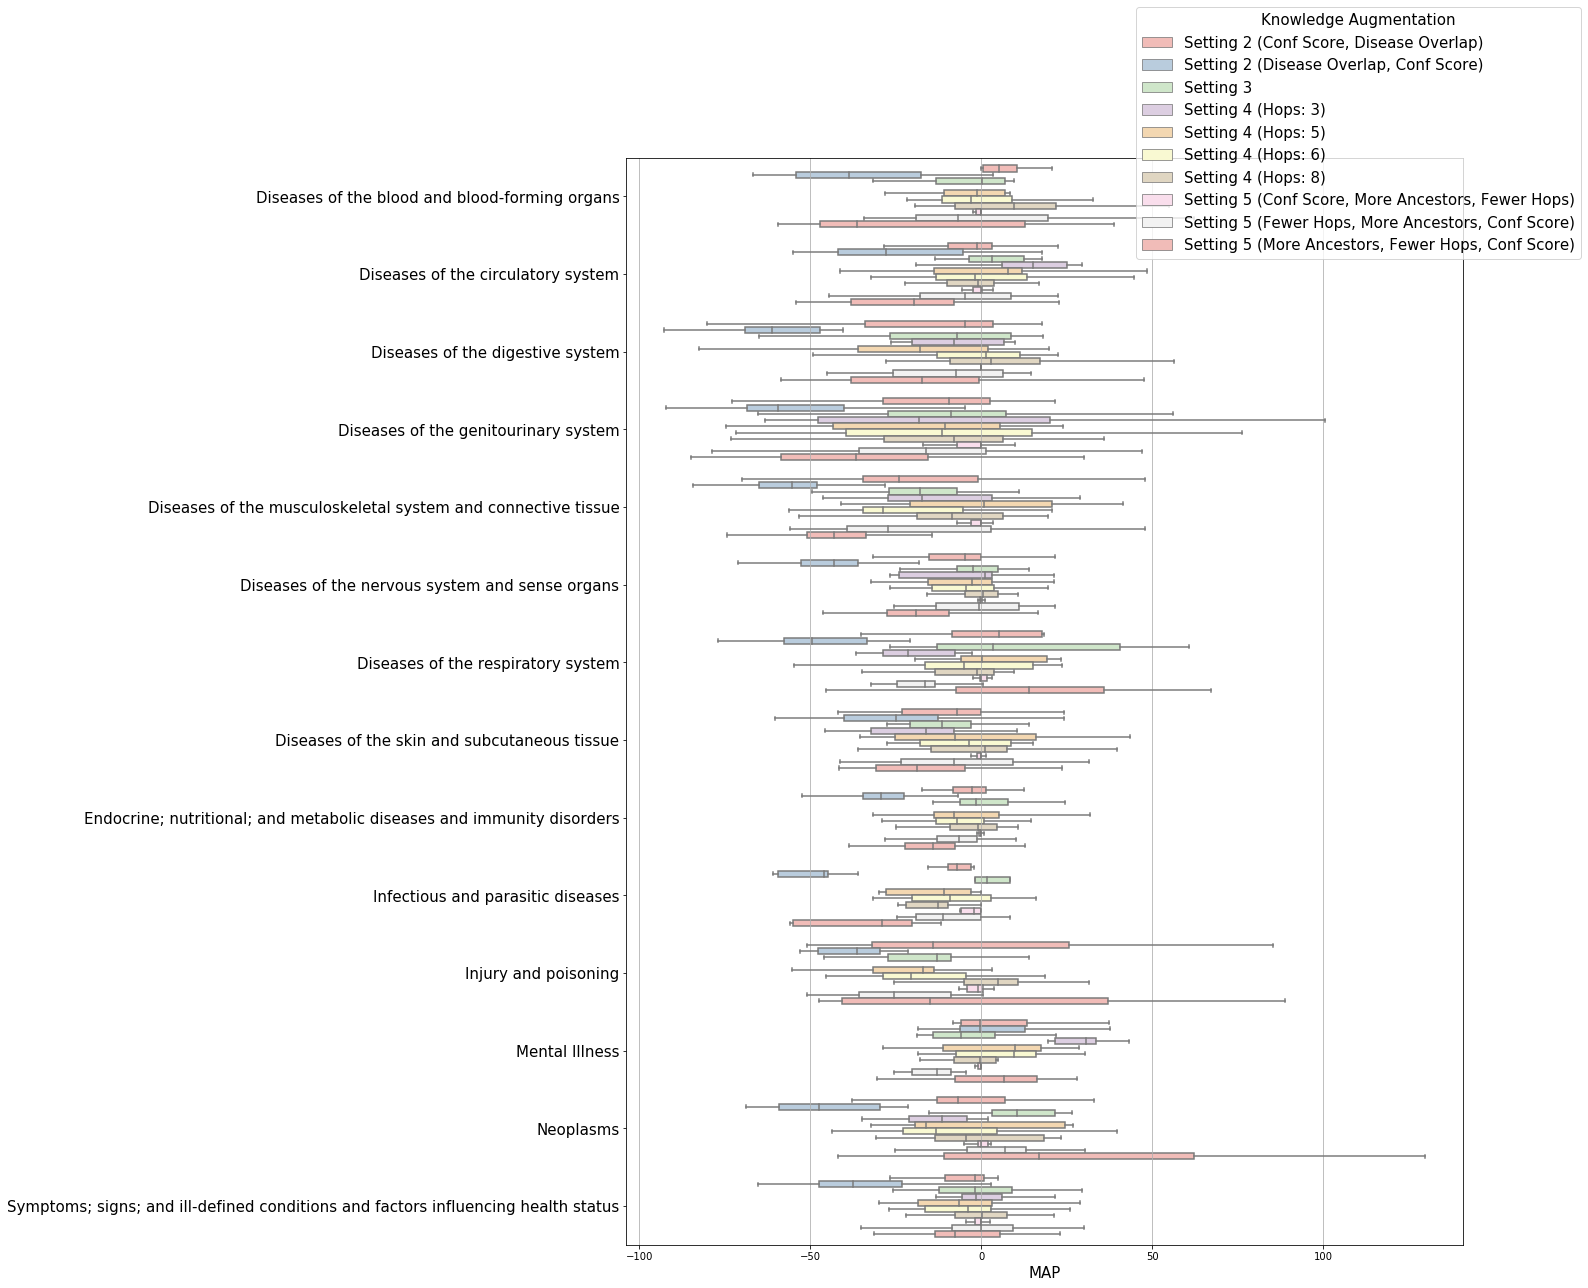

In [27]:
plot_df['grouping code'] = plot_df['grouping code'].astype('category')
plot_df['group_label'] = plot_df['grouping code'].cat.codes.values
# plot_df.head()

fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(x="map", y="grouping code", hue="setting", ax=ax,
            data=plot_df, palette="Pastel1", showfliers = False)
ax.set_ylabel(None)
ax.set_xlabel('MAP', fontsize=15)
ax.legend(title='Knowledge Augmentation', fontsize=15, title_fontsize=15, bbox_to_anchor=[0.6, 0.9])
ax.tick_params(axis='y', which='major', labelsize=15)
ax.xaxis.grid(True)

fig.savefig('../images/knowledge_subgroup.pdf', bbox_inches='tight')
#ax.set_xlabel(plot_df['grouping code'].cat.categories)